# Charul Gupta

# The Sparks Foundation

## Task-3

## Exploratory Data Analysis - Retail

### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [1]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#IMporting Dataset
data_retail=pd.read_csv('SampleSuperstore.csv', error_bad_lines=False)
data_retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
data_retail.shape

(9994, 13)

In [14]:
data_retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
data_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [17]:
data_retail.isnull().sum()
data_retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [18]:
data_retail.duplicated().value_counts()

False    9977
True       17
dtype: int64

In [20]:
s =data_retail['Sales'].sum()
p =data_retail['Profit'].sum()

print('Total Sales =',s)

print('Total Profit =',p)

print('Profit Percentage = ',(p/(s-p))*100,'%')

Total Sales = 2297200.8603
Total Profit = 286397.0217
Profit Percentage =  14.242912023651236 %


C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x1152 with 0 Axes>

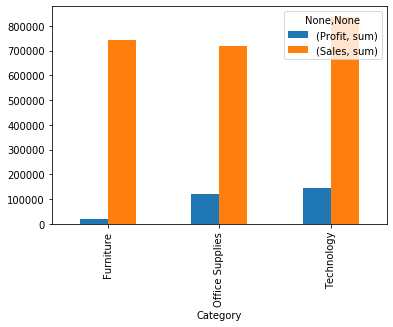

In [22]:
#Profit and sales analysis
plt.figure(figsize= (10,16))
data_retail.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

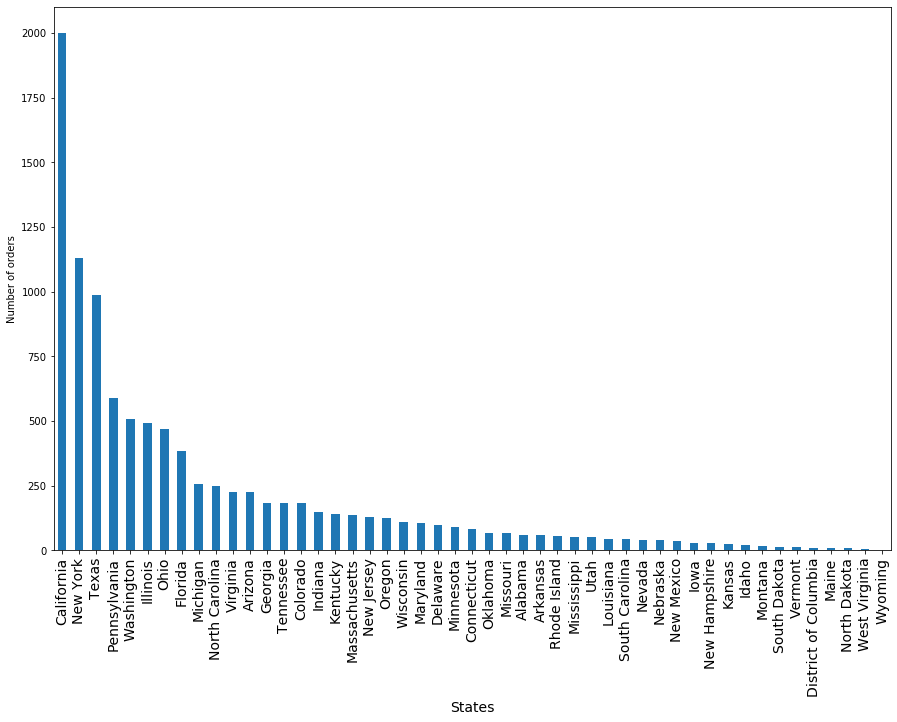

In [23]:
#analysing the total number of orders from different states
plt.figure(figsize=(15,10))
data_retail['State'].value_counts().plot.bar()
plt.xlabel("States",size=14)
plt.xticks(size=14)
plt.ylabel("Number of orders",size=10)
plt.show()

### Conclusion 1 - California has placed the maximum number of orders and Wyoming has placed minimum number of orders

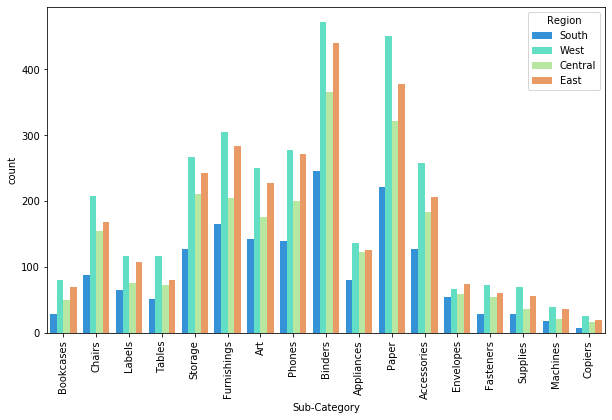

In [36]:
import seaborn as sns
#Region-wise analysis of the Subcategories and sales
plt.figure(figsize=(10,6))
sns.countplot(x="Sub-Category",hue="Region",data=data_retail,palette='rainbow')
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 2 - West region is top in sales and Central is at the Bottom

In [27]:
#state wise Analysis of Sales ,Quantity, Discount, Profit
state_data=data_retail.groupby(['State'])[['Quantity','Sales','Discount','Profit']].mean()
state_data.head(10)

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,4.196721,319.846557,0.000000,94.865989
Arizona,3.848214,157.508933,0.303571,-15.303235
Arkansas,4.000000,194.635500,0.000000,66.811452
California,3.831584,228.729451,0.072764,38.171608
Colorado,3.807692,176.418231,0.316484,-35.867351
Connecticut,3.426829,163.223866,0.007317,42.823071
Delaware,3.822917,285.948635,0.006250,103.930988
District of Columbia,4.000000,286.502000,0.000000,105.958930
Florida,3.600522,233.612815,0.299347,-8.875461


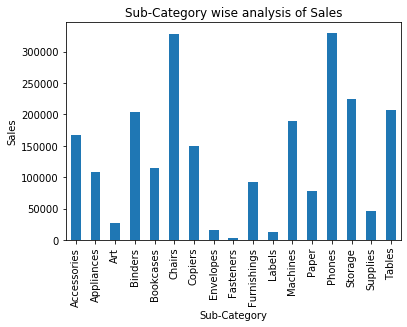

In [38]:
#sub-Category wise analysis of Sales
data_retail.groupby("Sub-Category").sum()["Sales"].plot.bar()
plt.title("Sub-Category wise analysis of Sales")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.show()

### Conclusion 3 - Phones and Chairs has maximum sale where as sale of reusable product like envelops is less
### Product whose sale is highest in west region does not impact much. 

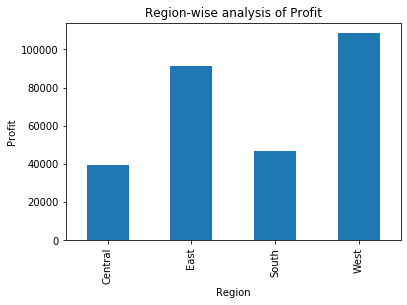

In [40]:
data_retail.groupby("Region").sum()["Profit"].plot.bar()
plt.title('Region-wise analysis of Profit')
plt.ylabel("Profit")
plt.show()

### Conclusion 4 - Sale can be increased in Southand East Region but will affect profit , West Region has highest profit Margin 

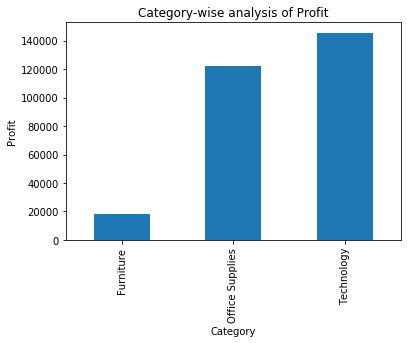

In [42]:
data_retail.groupby("Category").sum()["Profit"].plot.bar()
plt.title('Category-wise analysis of Profit')
plt.ylabel("Profit")
plt.show()

### Conclusion 5 - Tech Industry is the biggest Consumer of most of the products and gives upto 50% of market profit in comparison to ther categories

## Final Conclusion :
### 1) Western region has the biggest market place and gives maximum profit
### 2) Furniture Category discounts given had dragged the profits down, if it was done for the reason to increase sale then also it does'nt work well.
### 3) Market of Phones has highest sale thus give Tech companies highest profit in West region especially
### 4) Furniture Category has better sale in other regions but not in Central.

# Thank You